<a href="https://colab.research.google.com/github/yandri918/Belajar-python/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

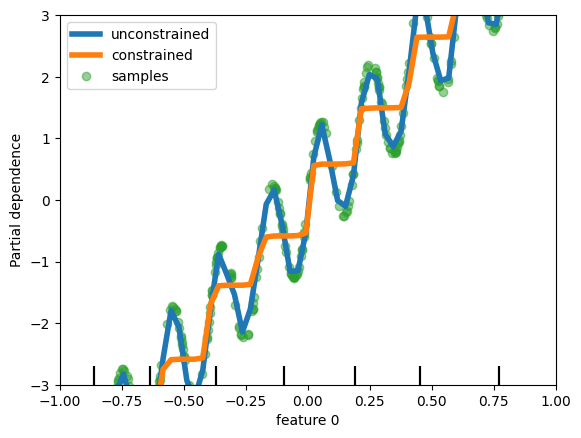

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

n_samples = 500
rng = np.random.RandomState(0)
X = rng.randn(n_samples, 2)
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = 5 * X[:, 0] + np.sin(10 * np.pi * X[:, 0]) - noise

rf_no_cst = RandomForestRegressor().fit(X, y)
rf_cst = RandomForestRegressor(monotonic_cst=[1, 0]).fit(X, y)

disp = PartialDependenceDisplay.from_estimator(
    rf_no_cst,
    X,
    features=[0],
    feature_names=["feature 0"],
    line_kw={"linewidth": 4, "label": "unconstrained", "color": "tab:blue"},
)
PartialDependenceDisplay.from_estimator(
    rf_cst,
    X,
    features=[0],
    line_kw={"linewidth": 4, "label": "constrained", "color": "tab:orange"},
    ax=disp.axes_,
)
disp.axes_[0, 0].plot(
    X[:, 0], y, "o", alpha=0.5, zorder=-1, label="samples", color="tab:green"
)
disp.axes_[0, 0].set_ylim(-3, 3)
disp.axes_[0, 0].set_xlim(-1, 1)
disp.axes_[0, 0].legend()
plt.show()